# 本 ipynb 目標
> 把特徵除理好存成 excel(或是csv)

[刪除output](https://www.codegrepper.com/code-examples/python/how+to+clear+output+in+jupyter+notebook)

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from IPython.display import clear_output

# import 之前寫的東西 -> import_ipynb 可以用
import import_ipynb
import Extraction

clear_output(wait= False)


In [2]:
os.getcwd()

'c:\\Users\\BOIL_PO\\Desktop\\VFT_clean_version'

In [3]:
# 看濾波完的東西，
all_filtered_csv = glob.glob('Filtered/*.csv')

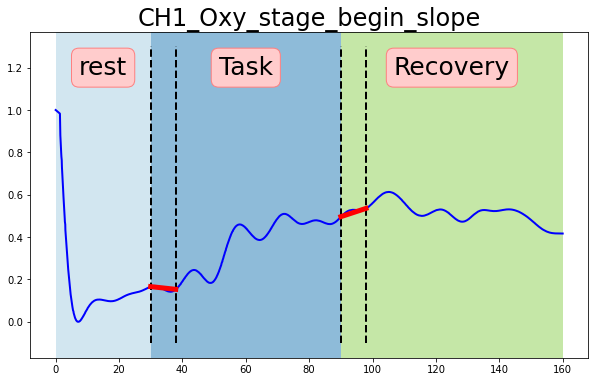

[-0.0016157953479778234, -0.0008893355043695251, -0.0009082704387460352, 7.238027110162415e-05, -0.0012035239215363383, 0.0012832346030395743, 0.0049303581390246765, 0.0003802477125629377, 0.031701221507794766, -0.008568961967923599, -0.001982845468370291, 0.008355354866807142] ['CH1_Oxy_Task_begin_slope', 'CH1_Deoxy_Task_begin_slope', 'CH2_Oxy_Task_begin_slope', 'CH2_Deoxy_Task_begin_slope', 'CH3_Oxy_Task_begin_slope', 'CH3_Deoxy_Task_begin_slope', 'CH1_Oxy_stage_Recovery_slope', 'CH1_Deoxy_stage_Recovery_slope', 'CH2_Oxy_stage_Recovery_slope', 'CH2_Deoxy_stage_Recovery_slope', 'CH3_Oxy_stage_Recovery_slope', 'CH3_Deoxy_stage_Recovery_slope']


In [4]:
df = pd.read_csv(all_filtered_csv[5])
df = df.drop(columns= ['Unnamed: 0', 'Time_Arduino', 'easingdata'])
df = df.set_index('Time_Host')

if __name__ == "__main__":
    value, ind = Extraction.stage_begin_slope(df, plot= True)

print(value, ind)

In [5]:
# 看有啥函數能用
# dir(Extraction)

In [6]:
df_all = pd.DataFrame()

# 沒錯就這樣，因為函數寫在隔壁了
for files in all_filtered_csv:

    temp_value = []
    temp_ind = []

    people = files.split('\\')[-1].split('.')[0].split('_')[-1]

    df = pd.read_csv(files)
    df = df.drop(columns= ['Unnamed: 0', 'Time_Arduino', 'easingdata'])
    df = df.set_index('Time_Host')

    value1, index1 = Extraction.stage_begin_slope(df)
    temp_value += value1; temp_ind += index1

    value2, index2 = Extraction.stage_mean(df)
    temp_value += value2; temp_ind += index2

    value3, index3 = Extraction.stage_mean_diff(df)
    temp_value += value3; temp_ind += index3

    value4, index4 = Extraction.stage_acivation(df)
    temp_value += value4; temp_ind += index4

    value5, index5 = Extraction.stage_std(df)
    temp_value += value5; temp_ind += index5

    value6, index6 = Extraction.stage_begin_slope_diff(df)
    temp_value += list(value6); temp_ind += index6

    value7, index7 = Extraction.stage_skew(df)
    temp_value += value7; temp_ind += index7

    value8, index8 = Extraction.stage_kurtosis(df)
    temp_value += value8; temp_ind += index8

    value9, index9 = Extraction.stage_auc(df)
    temp_value += value9; temp_ind += index9

    value10, index10 = Extraction.FFT(df)
    temp_value += value10; temp_ind += index10

    temp_ind, temp_value
    df_all[people] = temp_value

df_all.index = temp_ind


In [7]:
Features = df_all.T
Features.head()

,CH1_Oxy_Task_begin_slope,CH1_Deoxy_Task_begin_slope,CH2_Oxy_Task_begin_slope,CH2_Deoxy_Task_begin_slope,CH3_Oxy_Task_begin_slope,CH3_Deoxy_Task_begin_slope,CH1_Oxy_stage_Recovery_slope,CH1_Deoxy_stage_Recovery_slope,CH2_Oxy_stage_Recovery_slope,CH2_Deoxy_stage_Recovery_slope,...,CH3_Oxy Second Freq,CH3_Oxy Second Amp,CH3_Oxy Third Freq,CH3_Oxy Third Amp,CH3_Deoxy First Freq,CH3_Deoxy First Amp,CH3_Deoxy Second Freq,CH3_Deoxy Second Amp,CH3_Deoxy Third Freq,CH3_Deoxy Third Amp
Aak,0.024819,-0.013657,0.011554,-0.009824,0.012998,-0.020968,0.022015,-0.047618,0.057992,0.007034,...,0.099723,0.045054,0.116343,0.018806,0.033241,0.066239,0.074792,0.033351,0.091413,0.032022
Amiya,0.035790,-0.035772,-0.006235,0.020678,0.020728,0.019056,-0.031904,0.031897,-0.026799,-0.047282,...,0.091413,0.060163,0.049861,0.045932,0.024931,0.201037,0.049861,0.026774,0.074792,0.021590
April,0.019041,-0.044347,-0.012907,-0.014942,0.014461,-0.013636,-0.008208,0.014011,-0.010022,-0.009350,...,0.058091,0.016478,0.082988,0.016365,0.033195,0.091326,0.049793,0.086211,0.074689,0.032692
Archetto,0.016882,-0.028790,0.011429,-0.035307,0.004710,-0.004605,-0.031117,0.006936,-0.045191,-0.013461,...,0.041522,0.048479,0.083045,0.036470,0.041522,0.042617,0.024913,0.027272,0.107958,0.023621
Ash,0.068736,0.065589,0.057870,-0.034063,0.048478,-0.021619,0.010310,0.006476,0.007697,0.004553,...,0.049827,0.064042,0.132872,0.016568,0.024913,0.121502,0.041522,0.097635,0.066436,0.043672


In [8]:
Features.to_excel('Features.xlsx')